## **Homework #1 TIM 147**

#### **Install all import library prerequiste**

In [51]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "isntall" - maybe you meant "install"



Note: you may need to restart the kernel to use updated packages.


#### **Read Input Excel Data**

In [52]:
import pandas
dataframe = pandas.read_excel("Customer_Churn.xlsx")
dataframe.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


- The data seems to be answers collected by a survey completed by a cell phone company to understand customer statisfication and determine whether their could be a possible correlation to why people are leaving the plan. 

#### **Understand data**

In [53]:
dataframe.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [54]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [55]:
CustomerChanging = dataframe.loc[dataframe["LEAVE"].isin(["LEAVE"])]
CustomerNotChanging = dataframe.loc[dataframe["LEAVE"].isin(["STAY"])]

- The income + household price and overage - leftover could be great indictors whether the customer would leave or not. 
- I split the dataset into customers who left the plan and customers that are currently staying with the plan and haven't left. 
    - As this split would ensure the comparison of the great indicators would show directly a possible pattern if any why some customers have left or stayed using the cellphone plan. 

In [65]:
householdpricedataframeCustomerChanging = CustomerChanging["INCOME"] + CustomerChanging["HOUSE"]
print("\nCustomer willing to change houshold + income info")
householdpricedataframeCustomerChanging.info()
print(householdpricedataframeCustomerChanging.head())
householdpricedataframeCustomerNotChanging = CustomerNotChanging["INCOME"] + CustomerNotChanging["HOUSE"]
print("\nCustomer's unwilling to change household + income info")
householdpricedataframeCustomerNotChanging.info()
print(householdpricedataframeCustomerNotChanging.head())
overageCustomerChanging = CustomerChanging["OVERAGE"] - CustomerChanging["LEFTOVER"]
print("\nCustomer's willing to change overage - leftover info")
overageCustomerChanging.info()
print(overageCustomerChanging.head())
overageCustomerNotChanging = CustomerNotChanging["OVERAGE"] - CustomerNotChanging["LEFTOVER"]
print("\nCustomer's unwilling to change overage - leftover info")
overageCustomerNotChanging.info()
print(overageCustomerNotChanging.head())


Customer willing to change houshold + income info
<class 'pandas.core.series.Series'>
Index: 9852 entries, 3 to 19999
Series name: None
Non-Null Count  Dtype
--------------  -----
9852 non-null   int64
dtypes: int64(1)
memory usage: 153.9 KB
3     908305
9     259384
18    653348
20    411634
22    317843
dtype: int64

Customer's unwilling to change household + income info
<class 'pandas.core.series.Series'>
Index: 10148 entries, 0 to 19996
Series name: None
Non-Null Count  Dtype
--------------  -----
10148 non-null  int64
dtypes: int64(1)
memory usage: 158.6 KB
0    345331
1    836733
2    332322
4    253999
5    766697
dtype: int64

Customer's willing to change overage - leftover info
<class 'pandas.core.series.Series'>
Index: 9852 entries, 3 to 19999
Series name: None
Non-Null Count  Dtype
--------------  -----
9852 non-null   int64
dtypes: int64(1)
memory usage: 153.9 KB
3       5
9     156
18      5
20      0
22    237
dtype: int64

Customer's unwilling to change overage - leftov

- Splitting the data into customer's that will leave and customer's that won't leave ensure that the income and values are compared against similiar customer's, which ensures the data won't be skewed. 

#### **Data Visualization**

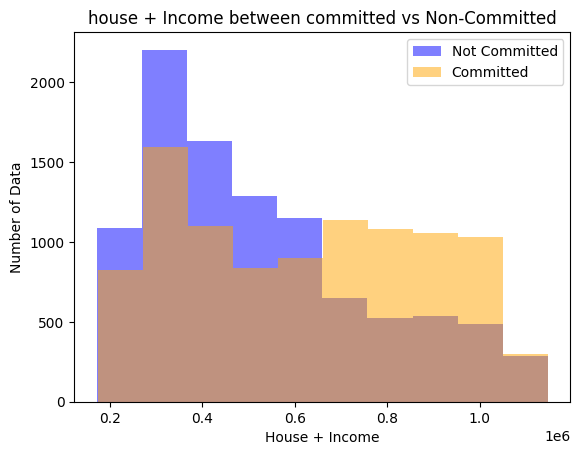

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
## ---- Used .sample from chatgpt to ensure a random sample is used as the datasets are not consistent in sample size ----
ax.hist(householdpricedataframeCustomerChanging.tolist(), color="blue", alpha=0.5, label="Not Committed")
ax.hist(householdpricedataframeCustomerNotChanging.sample(householdpricedataframeCustomerChanging.count()), color="orange", alpha=0.5, label="Committed")
ax.set_xlabel('House + Income')
ax.set_ylabel('Number of Data')
ax.set_title("house + Income between committed vs Non-Committed")
ax.legend()
plt.show()

- This histogram shows the house price and income between people that are committed and not committed. This is useful as it shows the house and income does have a possible affect on customers being committed or not comitted. 
- As it seems lower house price and income leads to more people that not comitted to the plan. 

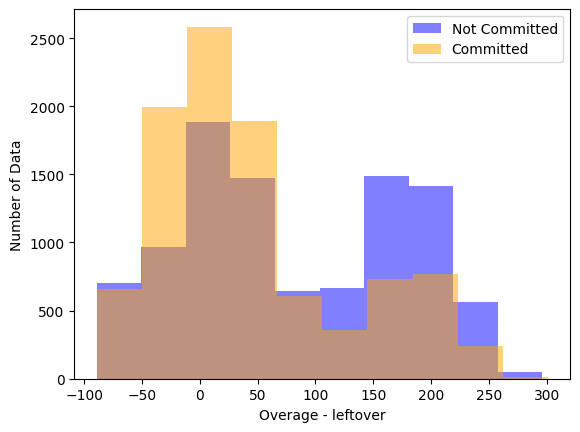

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
## ---- Used .sample from chatgpt to ensure a random sample is used as the datasets are not consistent in sample size ----
ax.hist(overageCustomerChanging.tolist(), color="blue", alpha=0.5, label="Not Committed")
ax.hist(overageCustomerNotChanging.sample(overageCustomerChanging.count()), color="orange", alpha=0.5, label="Committed")
ax.set_xlabel('Overage - leftover')
ax.set_ylabel('Number of Data')
ax.set_title("")
ax.legend()
plt.show()

- The histogram shows that overage and leftover between comitted and un comitted are possible correlation. 
- Customers with more overage are more likely to leave then customers with little to no overage and instead more time leftover. 

The conclusion is that overage, leftover, house, and income are all possible reasons a customer may be comitted or uncomitted to the phone plan. 